<a href="https://colab.research.google.com/github/RodLunardi/visualizacion_datos/blob/main/Ejercicio_de_visualizaci%C3%B3n_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [ ]:
filename = "/content/Viz5-July-2020-economic-empowerement(1).csv"
df = pd.read_csv(filename)
df.head()

,ID,Country,Code,Region,Income group,WBL Report Year,Question Category,Question,Text Answer,Index Score
0,AFG1971,Afghanistan,AFG,South Asia,Low income,1971,Assets,Do female and male surviving spouses have equa...,No,0.0
1,AFG1971,Afghanistan,AFG,South Asia,Low income,1971,Assets,Do men and women have equal ownership rights t...,Yes,20.0
2,AFG1971,Afghanistan,AFG,South Asia,Low income,1971,Assets,Do sons and daughters have equal rights to inh...,No,0.0
3,AFG1971,Afghanistan,AFG,South Asia,Low income,1971,Assets,Does the law grant spouses equal administrativ...,Yes,20.0
4,AFG1971,Afghanistan,AFG,South Asia,Low income,1971,Assets,Does the law provide for the valuation of nonm...,No,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65147 entries, 0 to 65146
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 65147 non-null  object 
 1   Country            65147 non-null  object 
 2   Code               65147 non-null  object 
 3   Region             65147 non-null  object 
 4   Income group       65147 non-null  object 
 5   WBL Report Year    65147 non-null  int64  
 6   Question Category  65147 non-null  object 
 7   Question           65146 non-null  object 
 8   Text Answer        65146 non-null  object 
 9   Index Score        65146 non-null  float64
dtypes: float64(1), int64(1), object(8)
memory usage: 5.0+ MB


In [ ]:
df.duplicated().sum()

0

In [ ]:
data_null = df.loc[df['Code'].isna()==True]
data_null

,ID,Country,Code,Region,Income group,WBL Report Year,Question Category,Question,Text Answer,Index Score


In [ ]:
#Despues de verificar que habia una fila sin datos, la eliminé por se tratar de solo una fila
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65146 entries, 0 to 65145
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 65146 non-null  object 
 1   Country            65146 non-null  object 
 2   Code               65146 non-null  object 
 3   Region             65146 non-null  object 
 4   Income group       65146 non-null  object 
 5   WBL Report Year    65146 non-null  int64  
 6   Question Category  65146 non-null  object 
 7   Question           65146 non-null  object 
 8   Text Answer        65146 non-null  object 
 9   Index Score        65146 non-null  float64
dtypes: float64(1), int64(1), object(8)
memory usage: 5.5+ MB


In [ ]:
df['WBL Report Year'] = df['WBL Report Year'].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65146 entries, 0 to 65145
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 65146 non-null  object 
 1   Country            65146 non-null  object 
 2   Code               65146 non-null  object 
 3   Region             65146 non-null  object 
 4   Income group       65146 non-null  object 
 5   WBL Report Year    65146 non-null  int64  
 6   Question Category  65146 non-null  object 
 7   Question           65146 non-null  object 
 8   Text Answer        65146 non-null  object 
 9   Index Score        65146 non-null  float64
dtypes: float64(1), int64(1), object(8)
memory usage: 5.5+ MB


In [ ]:
text_answer_filter = df.groupby(['Question'])['Text Answer'].value_counts()
text_answer_filter

Question                                                                              Text Answer
Are periods of absence from work due to childcare accounted for in pension benefits?  No             1106
                                                                                      Yes             755
Are the ages at which men and women can retire with full pension benefits equal?      No             1254
                                                                                      Yes             607
Are the ages at which men and women can retire with partial pension benefits equal?   Yes            1155
                                                                                                     ... 
Is there no legal provision that requires a married woman to obey her husband?        No              242
Is there paid leave available to fathers?                                             No             1295
                                                      

In [ ]:
Score_mean_filter = df.groupby(['Country','Income group'])['Index Score'].mean().sort_values(ascending = False)
Score_mean_filter

Country                   Income group       
Canada                    High income            20.491429
Australia                 High income            17.248571
Bulgaria                  Upper middle income    16.940000
Austria                   High income            16.940000
Albania                   Upper middle income    16.305714
Belgium                   High income            16.248571
Bahamas, The              High income            15.734286
Barbados                  High income            15.588571
Belize                    Upper middle income    15.322857
Bosnia and Herzegovina    Upper middle income    15.225714
Azerbaijan                Upper middle income    15.208571
Belarus                   Upper middle income    14.908571
Colombia                  Upper middle income    14.685714
Antigua and Barbuda       High income            14.640000
Cabo Verde                Lower middle income    14.585714
China                     Upper middle income    14.454286
Armenia   

In [ ]:
report_year_filter = df.groupby(['WBL Report Year'])['Index Score'].mean()
report_year_filter

In [ ]:
report_year_filter=report_year_filter.reset_index()
report_year_filter.describe()

,level_0,index,WBL Report Year,Index Score
count,50.00000,50.00000,50.00000,50.000000
mean,24.50000,24.50000,1995.50000,13.348422
std,14.57738,14.57738,14.57738,2.267978
min,0.00000,0.00000,1971.00000,9.973684
25%,12.25000,12.25000,1983.25000,11.535714
50%,24.50000,24.50000,1995.50000,13.048263
75%,36.75000,36.75000,2007.75000,15.514479
max,49.00000,49.00000,2020.00000,17.104247


<ipython-input-60-78430bdaf730>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xtickslabels)


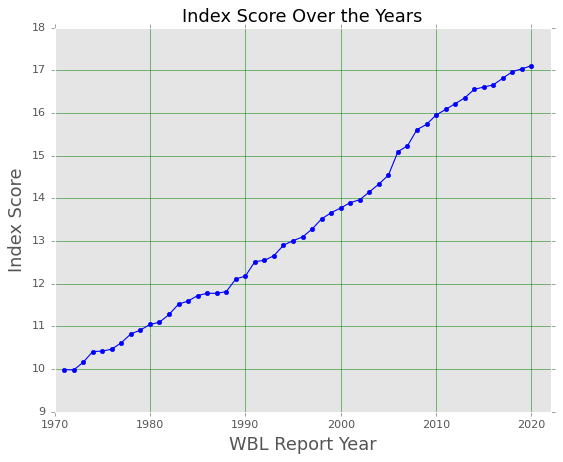

In [ ]:
# Can convert to NumPy array or list
uniqueYears = np.array(report_year_filter.index)
uniqueYears
meanScore = np.array(report_year_filter.values)
meanScore
fig,ax=plt.subplots()
plt.style.available
plt.style.use('ggplot')
ax.plot(report_year_filter['WBL Report Year'], report_year_filter['Index Score'],c = 'b', marker = '.', markersize = 8)
plt.xlim(right=2022)
xticks=ax.get_xticks()
xtickslabels=['{:.0f}'.format(x) for x in xticks]#formato decimales de 1000 -> '{:.0f}'.format(x)
ax.set_xticklabels(xtickslabels)
plt.xlabel('WBL Report Year', fontsize = 16)
plt.ylabel('Index Score', fontsize = 16)
plt.title('Index Score Over the Years', fontsize = 16)
plt.grid(c = 'g', alpha = .9,linestyle = '-')
plt.show()

In [ ]:
income_filter = df.groupby(['Income group'])['Index Score'].mean().sort_values(ascending = False)
income_filter

Income group
High income            14.604000
Upper middle income    13.987033
Lower middle income    12.203571
Low income             11.367933
Name: Index Score, dtype: float64

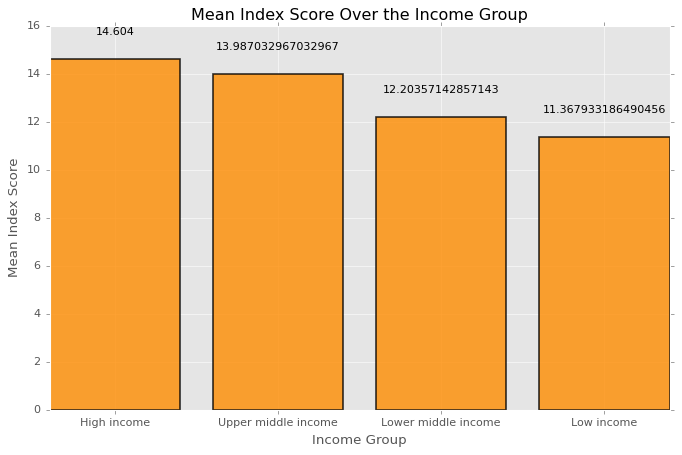

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.style.use('tableau-colorblind10')
plt.bar(income_filter.index, income_filter.values, color='#FF8C00', edgecolor='k', linewidth=1.5, alpha=0.8)
for i, v in enumerate(income_filter.values):
    plt.text(i, v + 1, str(v), ha='center') # codigo para colocar montos correspondiente a las barras
ax.set_title('Mean Index Score Over the Income Group')
ax.set_xlabel('Income Group')
ax.set_ylabel('Mean Index Score')
plt.show()

In [ ]:
region_filter = df.groupby(['Region'])['Index Score'].mean().sort_values(ascending = False)
region_filter

Region
High income: OECD             16.689714
Europe & Central Asia         15.506667
Latin America & Caribbean     14.377500
East Asia & Pacific           12.780000
Sub-Saharan Africa            11.845384
South Asia                     9.646667
Middle East & North Africa     8.178571
Name: Index Score, dtype: float64

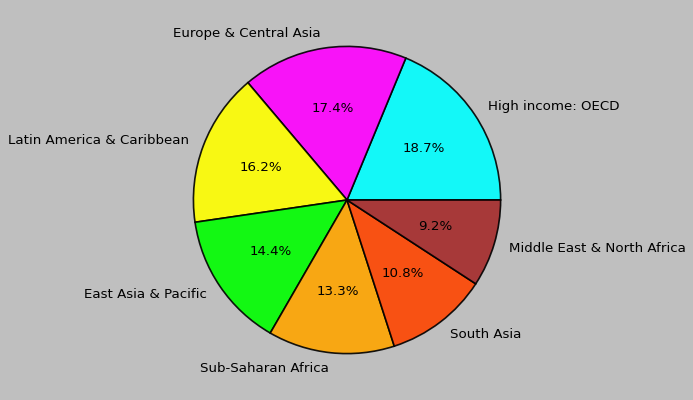

In [ ]:
region_filter = df.groupby(['Region'])['Index Score'].mean().sort_values(ascending = False)
plt.style.use('classic')
colors = ['#00FFFF', '#FF00FF', '#FFFF00', '#00FF00', '#FFA500', '#FF4500','#A52A2A']
plt.pie(region_filter.values, labels=region_filter.keys(), colors=colors, wedgeprops=dict(edgecolor='k', linewidth=1.5, alpha=0.9),autopct='%1.1f%%')
plt.show()